# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Main Branch- https://github.com/archinarula/Group-5-Project/tree/main/Resources

## Dependencies

In [3]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

## Import the combined source data

In [5]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df_all= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


In [6]:
#Combined dataframe
print (Combined_df_all.shape)
Combined_df_all.head()


(886, 16)


,Extract_Date,Reported_Date,City,is_newyork,Population,Data_Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [8]:
# Delete extraneous columns
Combined_df=Combined_df_all.drop(["Population","Data_Source"], axis=1)
Combined_df.head()

,Extract_Date,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [9]:
Combined_df.tail()

,Extract_Date,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
881,2021-05-30,2021-05-12,Sao Paulo,0,2808,2069.00,23.66,17.43,17.55,79.12,18.682857,71.952857,18.600667,72.612000
882,2021-05-30,2021-05-13,Sao Paulo,0,2505,2084.00,21.10,17.56,15.76,84.46,18.208571,73.975714,18.492000,72.628000
883,2021-05-30,2021-05-14,Sao Paulo,0,3248,2189.00,27.36,18.44,16.58,74.25,17.447143,76.582857,18.301333,73.433333
884,2021-05-30,2021-05-15,Sao Paulo,0,2732,2293.86,23.02,19.33,17.32,77.08,17.352857,75.772857,18.254667,73.452667
885,2021-05-30,2021-05-16,Sao Paulo,0,1544,2330.86,13.01,19.64,17.97,75.67,17.445714,75.742857,18.232667,73.769333


In [10]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Extract_Date                  886 non-null    object        
 1   Reported_Date                 886 non-null    datetime64[ns]
 2   City                          886 non-null    object        
 3   is_newyork                    886 non-null    int64         
 4   New_Cases                     886 non-null    int64         
 5   mavg_7day_new_cases           886 non-null    float64       
 6   new_cases_per_100K            886 non-null    float64       
 7   mavg_7day_per_100k_new_cases  886 non-null    float64       
 8   daily_temp                    886 non-null    float64       
 9   daily_humidity                886 non-null    float64       
 10  mavg_7_temp                   886 non-null    float64       
 11  mavg_7_humidity               88

In [11]:
import warnings
warnings.filterwarnings("ignore")

# CORRELATION- Both Cities combined

## Both Cities-all variables -SPEARMAN

### Both Cities Combine - spearman Heatmap

<AxesSubplot:>

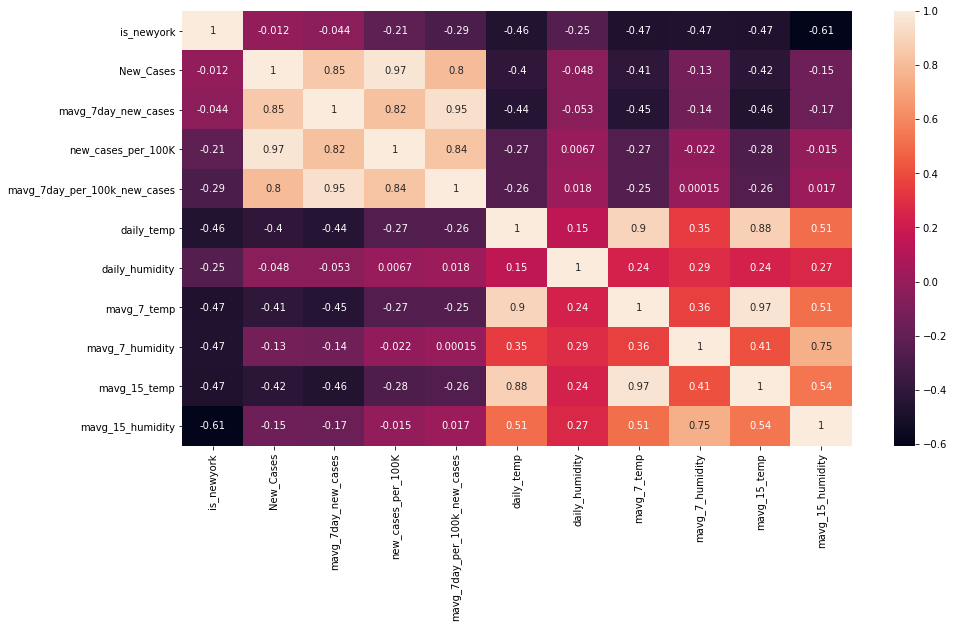

In [12]:
# Let us get the correlation in the data using Seaborn Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(Combined_df.corr("spearman"), annot = True)

### Both Cities Combine - spearman Gradient

In [13]:
# Correlation using Spearman correlation test 
Combined_df.corr(method='spearman').style.background_gradient('viridis')

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
is_newyork,1.000000,-0.011827,-0.044191,-0.213480,-0.288458,-0.456258,-0.253671,-0.469872,-0.468257,-0.472263,-0.606760
New_Cases,-0.011827,1.000000,0.851225,0.973199,0.804293,-0.402970,-0.048307,-0.406692,-0.128732,-0.419427,-0.151174
mavg_7day_new_cases,-0.044191,0.851225,1.000000,0.818860,0.952108,-0.444492,-0.052937,-0.447354,-0.138314,-0.458916,-0.165008
new_cases_per_100K,-0.213480,0.973199,0.818860,1.000000,0.836380,-0.265432,0.006730,-0.266434,-0.021746,-0.279697,-0.014931
mavg_7day_per_100k_new_cases,-0.288458,0.804293,0.952108,0.836380,1.000000,-0.256181,0.018092,-0.252565,0.000146,-0.262387,0.016829
daily_temp,-0.456258,-0.402970,-0.444492,-0.265432,-0.256181,1.000000,0.149263,0.902887,0.345074,0.883967,0.506385
daily_humidity,-0.253671,-0.048307,-0.052937,0.006730,0.018092,0.149263,1.000000,0.236358,0.285398,0.239906,0.268435
mavg_7_temp,-0.469872,-0.406692,-0.447354,-0.266434,-0.252565,0.902887,0.236358,1.000000,0.364418,0.967387,0.510854
mavg_7_humidity,-0.468257,-0.128732,-0.138314,-0.021746,0.000146,0.345074,0.285398,0.364418,1.000000,0.412868,0.751355
mavg_15_temp,-0.472263,-0.419427,-0.458916,-0.279697,-0.262387,0.883967,0.239906,0.967387,0.412868,1.000000,0.536373


### Both Cities Combine - pearson Gradient

In [14]:
# Correlation using Pearson correlation test 
Combined_df.corr(method='pearson').style.background_gradient('viridis')

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
is_newyork,1.000000,0.019691,0.029106,-0.231507,-0.285644,-0.508187,-0.285429,-0.536725,-0.454348,-0.551436,-0.568470
New_Cases,0.019691,1.000000,0.826242,0.943143,0.765869,-0.428505,-0.056443,-0.437567,-0.115250,-0.441178,-0.126687
mavg_7day_new_cases,0.029106,0.826242,1.000000,0.721882,0.925977,-0.512568,-0.074222,-0.522971,-0.145505,-0.527556,-0.163751
new_cases_per_100K,-0.231507,0.943143,0.721882,1.000000,0.781772,-0.197743,0.026230,-0.194041,0.007812,-0.193873,0.029526
mavg_7day_per_100k_new_cases,-0.285644,0.765869,0.925977,0.781772,1.000000,-0.252539,0.027037,-0.248244,0.005520,-0.247705,0.023944
daily_temp,-0.508187,-0.428505,-0.512568,-0.197743,-0.252539,1.000000,0.234358,0.918339,0.353313,0.915018,0.465956
daily_humidity,-0.285429,-0.056443,-0.074222,0.026230,0.027037,0.234358,1.000000,0.273299,0.369524,0.282213,0.310574
mavg_7_temp,-0.536725,-0.437567,-0.522971,-0.194041,-0.248244,0.918339,0.273299,1.000000,0.406251,0.980291,0.499563
mavg_7_humidity,-0.454348,-0.115250,-0.145505,0.007812,0.005520,0.353313,0.369524,0.406251,1.000000,0.435133,0.795117
mavg_15_temp,-0.551436,-0.441178,-0.527556,-0.193873,-0.247705,0.915018,0.282213,0.980291,0.435133,1.000000,0.531517


### Both Cities Combine - kendall Gradient

In [15]:
# Correlation using Kendall correlation test 
Combined_df.corr(method='kendall').style.background_gradient('viridis')

,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
is_newyork,1.000000,-0.009666,-0.036107,-0.174491,-0.235740,-0.372833,-0.207322,-0.383876,-0.382558,-0.385823,-0.495704
New_Cases,-0.009666,1.000000,0.677476,0.883411,0.632480,-0.278566,-0.032648,-0.285538,-0.085207,-0.300103,-0.100299
mavg_7day_new_cases,-0.036107,0.677476,1.000000,0.627724,0.858410,-0.308032,-0.033677,-0.310480,-0.092924,-0.327546,-0.106047
new_cases_per_100K,-0.174491,0.883411,0.627724,1.000000,0.665433,-0.185957,0.003990,-0.190244,-0.014960,-0.204103,-0.008598
mavg_7day_per_100k_new_cases,-0.235740,0.632480,0.858410,0.665433,1.000000,-0.178414,0.012148,-0.176641,-0.001493,-0.191744,0.012253
daily_temp,-0.372833,-0.278566,-0.308032,-0.185957,-0.178414,1.000000,0.086536,0.726247,0.219442,0.701011,0.335184
daily_humidity,-0.207322,-0.032648,-0.033677,0.003990,0.012148,0.086536,1.000000,0.155300,0.196022,0.160187,0.187744
mavg_7_temp,-0.383876,-0.285538,-0.310480,-0.190244,-0.176641,0.726247,0.155300,1.000000,0.224424,0.847168,0.335590
mavg_7_humidity,-0.382558,-0.085207,-0.092924,-0.014960,-0.001493,0.219442,0.196022,0.224424,1.000000,0.257335,0.568901
mavg_15_temp,-0.385823,-0.300103,-0.327546,-0.204103,-0.191744,0.701011,0.160187,0.847168,0.257335,1.000000,0.346772


#### New Cases Per 100K with MAVG 15 days Temp and Humidity

In [16]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NewCases100K = Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity", "is_newyork"]]
print (NewCases100K.shape)
NewCases100K.head()

(886, 5)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity,is_newyork
0,2020-02-29,0.01,3.500000,56.268000,1
1,2020-03-01,0.00,3.432000,55.587333,1
2,2020-03-02,0.00,3.816000,55.348667,1
3,2020-03-03,0.01,4.190667,54.404000,1
4,2020-03-04,0.03,4.576667,55.585333,1


In [17]:
# Spearman correlation test 
NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity,is_newyork
new_cases_per_100K,1.000000,-0.279697,-0.014931,-0.213480
mavg_15_temp,-0.279697,1.000000,0.536373,-0.472263
mavg_15_humidity,-0.014931,0.536373,1.000000,-0.606760
is_newyork,-0.213480,-0.472263,-0.606760,1.000000


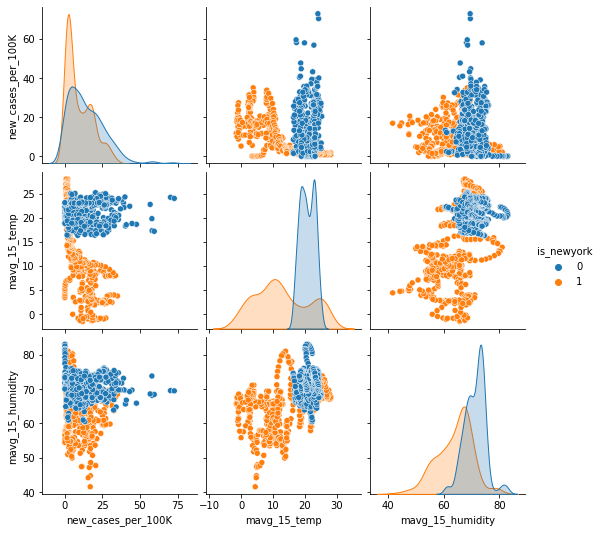

In [18]:
#Pair Plotting to see relationship

PP_NewCases100K= sns.pairplot(data=NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'], hue="is_newyork")

#### MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [19]:
#extract relevant coloumns to check the relations- new_cases_per_100K with mavg_15_temp and mavg_15_humidity

MAVG7NewCases100K = Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity',"is_newyork"]]
print (MAVG7NewCases100K.shape)
MAVG7NewCases100K.head()

(886, 5)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity,is_newyork
0,2020-02-29,0.01,3.500000,56.268000,1
1,2020-03-01,0.00,3.432000,55.587333,1
2,2020-03-02,0.00,3.816000,55.348667,1
3,2020-03-03,0.00,4.190667,54.404000,1
4,2020-03-04,0.01,4.576667,55.585333,1


In [20]:
# Spearman correlation test 
MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity,is_newyork
mavg_7day_per_100k_new_cases,1.000000,-0.262387,0.016829,-0.288458
mavg_15_temp,-0.262387,1.000000,0.536373,-0.472263
mavg_15_humidity,0.016829,0.536373,1.000000,-0.606760
is_newyork,-0.288458,-0.472263,-0.606760,1.000000


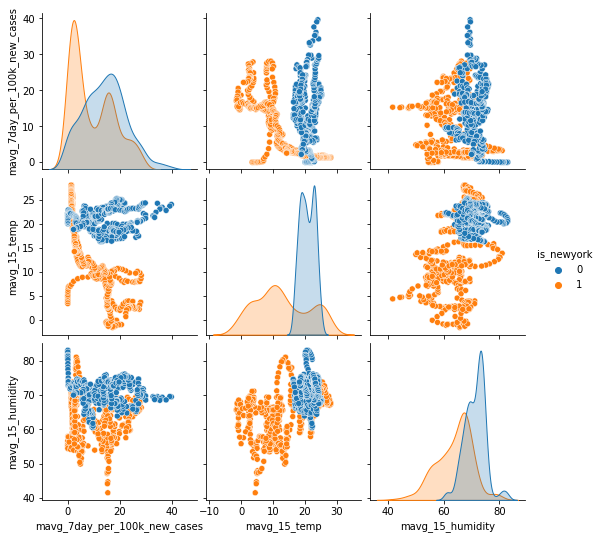

In [21]:
#Pair Plotting to see relationship
PP_MAVG7NewCases100K = sns.pairplot(data=MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'], hue="is_newyork")

# Correlation- New York Only (Combined Data) 


In [22]:
#extract only NY data
NY_Combined_df = Combined_df.loc[Combined_df['City']=='New York']
print (NY_Combined_df.shape)
NY_Combined_df.head()

(443, 14)


,Extract_Date,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


#### New Cases Per 100K with MAVG 15 days Temp and Humidity

In [23]:
#extract relevant coloumns to check the relations- NY new_cases_per_100K with mavg_15_temp and mavg_15_humidity

NY_NewCases100K = NY_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (NY_NewCases100K.shape)
NY_NewCases100K.head()

(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.500000,56.268000
1,2020-03-01,0.00,3.432000,55.587333
2,2020-03-02,0.00,3.816000,55.348667
3,2020-03-03,0.01,4.190667,54.404000
4,2020-03-04,0.03,4.576667,55.585333


In [24]:
# Spearman correlation test 
NY_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,-0.790140,-0.249497
mavg_15_temp,-0.790140,1.000000,0.380189
mavg_15_humidity,-0.249497,0.380189,1.000000


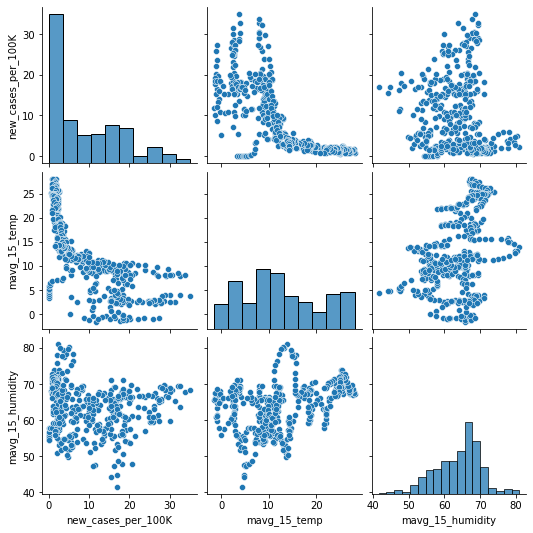

In [25]:
#Pair Plotting to see relationship

#PP_NY_NewCases_dailyTH = sns.pairplot(data=NY_NewCases_dailyTH, y_vars=['New_Cases'],x_vars=['daily_temp', 'daily_humidity'])

PP_NY_NewCases100K= sns.pairplot(data=NY_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

#### MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [26]:
#extract relevant coloumns to check the relations- NY Moving 7 days Avgs

NY_MAVG7NewCases100K = NY_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (NY_MAVG7NewCases100K.shape)
NY_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
0,2020-02-29,0.01,3.500000,56.268000
1,2020-03-01,0.00,3.432000,55.587333
2,2020-03-02,0.00,3.816000,55.348667
3,2020-03-03,0.00,4.190667,54.404000
4,2020-03-04,0.01,4.576667,55.585333


In [27]:
# Spearman correlation test 
NY_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,-0.806508,-0.247759
mavg_15_temp,-0.806508,1.000000,0.380189
mavg_15_humidity,-0.247759,0.380189,1.000000


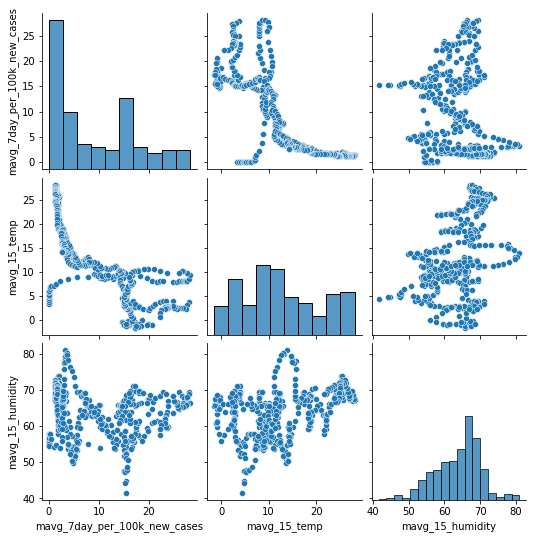

In [28]:
#Pair Plotting to see relationship

#PP_NY_MAVG7NewCases_TH = sns.pairplot(data=NY_MAVG7NewCases_TH, y_vars=['mavg_7day_new_cases'],x_vars=['mavg_7_temp', 'mavg_7_humidity'])

PP_NY_MAVG7NewCases100K = sns.pairplot(data=NY_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])

# Correlation- Sau Paulo Only (Combined Data)

In [29]:
#extract only SP data
SP_Combined_df = Combined_df.loc[Combined_df['City']=='Sao Paulo']
print (SP_Combined_df.shape)
SP_Combined_df.head()

(443, 14)


,Extract_Date,Reported_Date,City,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2021-05-30,2020-02-29,Sao Paulo,0,0,0.20,0.00,0.0,20.47,85.96,20.224286,83.507143,22.213333,80.343333
444,2021-05-30,2020-03-01,Sao Paulo,0,0,0.17,0.00,0.0,19.50,85.50,20.374286,83.578571,22.159333,80.812667
445,2021-05-30,2020-03-02,Sao Paulo,0,0,0.14,0.00,0.0,19.61,85.81,20.490000,84.471429,21.902000,81.646000
446,2021-05-30,2020-03-03,Sao Paulo,0,0,0.14,0.00,0.0,19.17,85.53,20.321429,85.334286,21.606667,82.187333
447,2021-05-30,2020-03-04,Sao Paulo,0,1,0.29,0.01,0.0,19.61,79.08,19.787143,85.832857,21.242000,82.764000


#### New Cases Per 100K with MAVG 15 days Temp and Humidity

In [30]:
#extract relevant coloumns to check the relations- SP new_cases_per_100K with mavg_15_temp and mavg_15_humidity

SP_NewCases100K = SP_Combined_df[["Reported_Date", "new_cases_per_100K", "mavg_15_temp", "mavg_15_humidity"]]
print (SP_NewCases100K.shape)
SP_NewCases100K.head()


(443, 4)


,Reported_Date,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.00,22.213333,80.343333
444,2020-03-01,0.00,22.159333,80.812667
445,2020-03-02,0.00,21.902000,81.646000
446,2020-03-03,0.00,21.606667,82.187333
447,2020-03-04,0.01,21.242000,82.764000


In [31]:
# Spearman correlation test 
SP_NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,new_cases_per_100K,mavg_15_temp,mavg_15_humidity
new_cases_per_100K,1.000000,0.031767,-0.109070
mavg_15_temp,0.031767,1.000000,0.229808
mavg_15_humidity,-0.109070,0.229808,1.000000


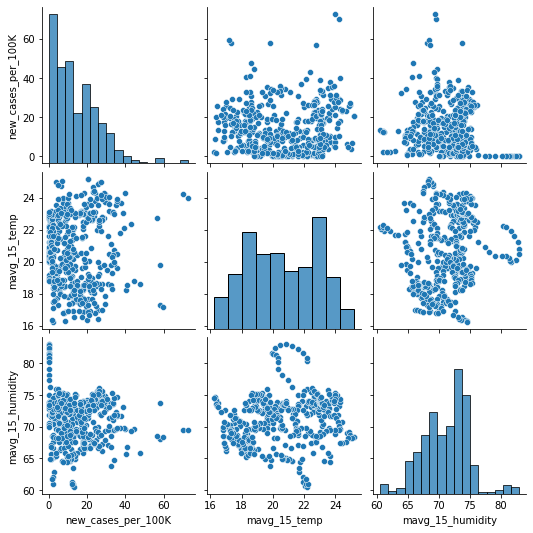

In [32]:
#Pair Plotting to see relationship

PP_SP_NewCases100K= sns.pairplot(data=SP_NewCases100K, y_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'],x_vars=['new_cases_per_100K','mavg_15_temp', 'mavg_15_humidity'])

#### MAVG 7 Days New Cases Per 100K with MAVG 15 days Temp and Humidity

In [33]:
#extract relevant coloumns to check the relations- SP mavg_7day_per_100k_new_cases with mavg_15_temp and mavg_15_humidity

SP_MAVG7NewCases100K = SP_Combined_df[["Reported_Date", "mavg_7day_per_100k_new_cases", 'mavg_15_temp', 'mavg_15_humidity']]
print (SP_MAVG7NewCases100K.shape)
SP_MAVG7NewCases100K.head()

(443, 4)


,Reported_Date,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
443,2020-02-29,0.0,22.213333,80.343333
444,2020-03-01,0.0,22.159333,80.812667
445,2020-03-02,0.0,21.902000,81.646000
446,2020-03-03,0.0,21.606667,82.187333
447,2020-03-04,0.0,21.242000,82.764000


In [34]:
# Spearman correlation test 
SP_MAVG7NewCases100K.corr(method='spearman').style.background_gradient('viridis')

,mavg_7day_per_100k_new_cases,mavg_15_temp,mavg_15_humidity
mavg_7day_per_100k_new_cases,1.000000,0.052505,-0.115123
mavg_15_temp,0.052505,1.000000,0.229808
mavg_15_humidity,-0.115123,0.229808,1.000000


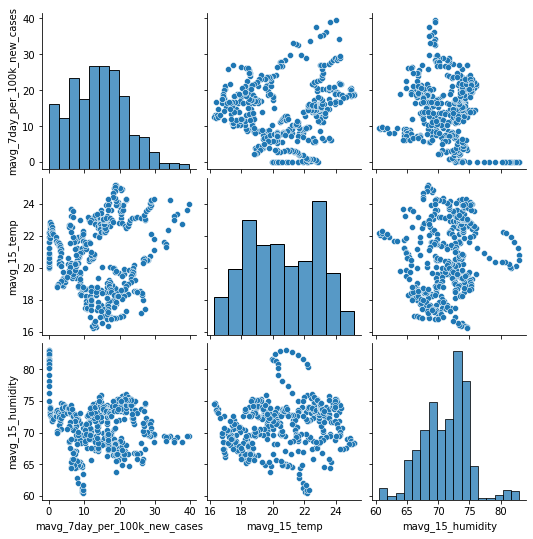

In [35]:
#Pair Plotting to see relationship

PP_SP_MAVG7NewCases100K= sns.pairplot(data=SP_MAVG7NewCases100K, y_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'],x_vars=['mavg_7day_per_100k_new_cases','mavg_15_temp', 'mavg_15_humidity'])